In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
import pandas as pd

In [3]:
from sklearn.manifold import TSNE

In [4]:
import tsnecuda

In [21]:
data = pd.read_csv('ATLAS_LC/signatures_16_encoded.csv')

In [6]:
encod_cols = [col for col in data.columns if 'encode' in col]

In [7]:
test_set = data.sample(5000)

In [8]:
from MulticoreTSNE import MulticoreTSNE as mTSNE

In [31]:
t = mTSNE(n_components=2, perplexity=20, learning_rate=50, early_exaggeration=200, n_jobs=8)
%time embed = t.fit_transform(test_set[encod_cols].values)

CPU times: user 1min 3s, sys: 93.6 ms, total: 1min 3s
Wall time: 16 s


In [32]:
embed.shape

(5000, 2)

In [33]:
test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

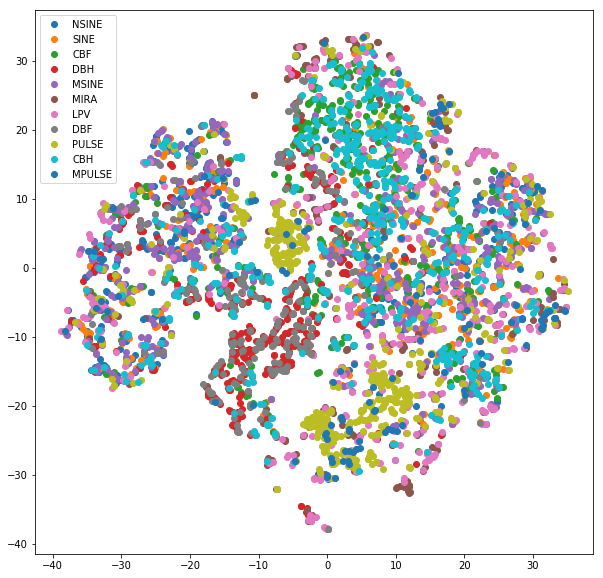

In [34]:
plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname)
    i+=1
plt.legend()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
import ml_experiment as ml

In [11]:
clf = KNeighborsClassifier()

In [12]:
Y = test_set['CLASS'].values
X = test_set[['embed_0', 'embed_1']].values

KeyError: "['embed_0' 'embed_1'] not in index"

In [39]:
res = ml.experiment(clf=clf, multiclass=True, nfolds=10, printing=True, x=X, y=Y)['f1']

             precision    recall  f1-score   support

        CBF       0.29      0.40      0.33       571
        CBH       0.27      0.31      0.29       566
        DBF       0.25      0.21      0.23       273
        DBH       0.51      0.52      0.52       484
        LPV       0.33      0.32      0.32       503
       MIRA       0.49      0.39      0.43       222
     MPULSE       0.12      0.07      0.09       140
      MSINE       0.23      0.23      0.23       573
      NSINE       0.29      0.29      0.29       539
      PULSE       0.66      0.62      0.64       588
       SINE       0.22      0.15      0.17       541

avg / total       0.34      0.34      0.34      5000



KeyError: 'f1'

In [ ]:
ml.metrics.f1_score(res['y_test'], res['predictions'], average='micro')

In [36]:
perp = np.arange(5, 150, 5)
lrate = np.arange(10, 100, 20)
early_ex = np.arange(100, 800, 100)
header = ['perp', 'lrate', 'early_ex', 'f1']
rows = []

for anearly in early_ex:
    for alrate in lrate:
        for aperp in perp:
            t = mTSNE(n_components=2, perplexity=aperp, 
                      learning_rate=alrate, early_exaggeration=anearly, n_jobs=16, n_iter=500)
            %time embed = t.fit_transform(test_set[encod_cols].values)
            
            test_set['embed_0'] = embed[:, 0]
            test_set['embed_1'] = embed[:, 1]
            
            Y = test_set['CLASS'].values
            X = embed  # test_set[['embed_0', 'embed_1']].values
            
            clf = KNeighborsClassifier()# n_neighbors=aperp)
            
            res = ml.experiment(clf=clf, multiclass=True, nfolds=10, printing=True, x=X, y=Y)
            f1 = ml.metrics.f1_score(res['y_test'], res['predictions'], average='micro')
            
            rows.append([aperp, alrate, anearly, f1])

CPU times: user 38.5 s, sys: 48.4 ms, total: 38.5 s
Wall time: 6.52 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.23      0.26      0.25       567
        DBF       0.29      0.26      0.28       315
        DBH       0.41      0.42      0.41       492
        LPV       0.23      0.24      0.23       564
       MIRA       0.29      0.21      0.25       195
     MPULSE       0.09      0.04      0.06       151
      MSINE       0.25      0.28      0.26       551
      NSINE       0.20      0.17      0.18       516
      PULSE       0.55      0.53      0.54       554
       SINE       0.16      0.11      0.13       555

avg / total       0.28      0.28      0.28      5000

CPU times: user 45.9 s, sys: 112 ms, total: 46 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.22      0.37      0.28       540
        CBH       0.21      0.26      0.23       567
        DBF

CPU times: user 49.3 s, sys: 84.1 ms, total: 49.4 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.24      0.29      0.26       567
        DBF       0.27      0.25      0.26       315
        DBH       0.41      0.38      0.39       492
        LPV       0.23      0.23      0.23       564
       MIRA       0.33      0.24      0.27       195
     MPULSE       0.17      0.07      0.10       151
      MSINE       0.25      0.26      0.25       551
      NSINE       0.26      0.24      0.25       516
      PULSE       0.61      0.55      0.57       554
       SINE       0.19      0.13      0.15       555

avg / total       0.30      0.29      0.29      5000

CPU times: user 51.9 s, sys: 100 ms, total: 52 s
Wall time: 7.68 s
             precision    recall  f1-score   support

        CBF       0.19      0.33      0.24       540
        CBH       0.23      0.29      0.26       567
        DBF

CPU times: user 43.1 s, sys: 48.7 ms, total: 43.2 s
Wall time: 7.13 s
             precision    recall  f1-score   support

        CBF       0.24      0.38      0.30       540
        CBH       0.24      0.29      0.27       567
        DBF       0.35      0.36      0.35       315
        DBH       0.43      0.41      0.42       492
        LPV       0.25      0.26      0.25       564
       MIRA       0.40      0.29      0.34       195
     MPULSE       0.13      0.06      0.08       151
      MSINE       0.23      0.23      0.23       551
      NSINE       0.23      0.19      0.21       516
      PULSE       0.63      0.61      0.62       554
       SINE       0.18      0.12      0.15       555

avg / total       0.30      0.31      0.30      5000

CPU times: user 42.5 s, sys: 52.1 ms, total: 42.6 s
Wall time: 7.02 s
             precision    recall  f1-score   support

        CBF       0.24      0.35      0.29       540
        CBH       0.24      0.29      0.27       567
        

CPU times: user 51.6 s, sys: 16.1 ms, total: 51.6 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.23      0.36      0.28       540
        CBH       0.22      0.26      0.24       567
        DBF       0.29      0.30      0.30       315
        DBH       0.38      0.40      0.39       492
        LPV       0.22      0.23      0.22       564
       MIRA       0.28      0.17      0.21       195
     MPULSE       0.14      0.07      0.10       151
      MSINE       0.24      0.24      0.24       551
      NSINE       0.22      0.19      0.20       516
      PULSE       0.61      0.56      0.59       554
       SINE       0.20      0.14      0.16       555

avg / total       0.29      0.28      0.28      5000

CPU times: user 51 s, sys: 100 ms, total: 51.1 s
Wall time: 7.68 s
             precision    recall  f1-score   support

        CBF       0.22      0.34      0.26       540
        CBH       0.20      0.23      0.21       567
        DBF

CPU times: user 48 s, sys: 77.3 ms, total: 48.1 s
Wall time: 7.43 s
             precision    recall  f1-score   support

        CBF       0.25      0.37      0.30       540
        CBH       0.25      0.29      0.27       567
        DBF       0.27      0.26      0.27       315
        DBH       0.41      0.43      0.42       492
        LPV       0.27      0.29      0.28       564
       MIRA       0.34      0.24      0.28       195
     MPULSE       0.16      0.07      0.09       151
      MSINE       0.24      0.27      0.26       551
      NSINE       0.23      0.20      0.22       516
      PULSE       0.64      0.58      0.61       554
       SINE       0.20      0.13      0.16       555

avg / total       0.31      0.30      0.30      5000

CPU times: user 50 s, sys: 44.1 ms, total: 50 s
Wall time: 7.53 s
             precision    recall  f1-score   support

        CBF       0.25      0.36      0.29       540
        CBH       0.25      0.28      0.27       567
        DBF   

CPU times: user 54 s, sys: 108 ms, total: 54.1 s
Wall time: 8.08 s
             precision    recall  f1-score   support

        CBF       0.26      0.38      0.31       540
        CBH       0.24      0.29      0.26       567
        DBF       0.29      0.31      0.30       315
        DBH       0.39      0.39      0.39       492
        LPV       0.26      0.28      0.27       564
       MIRA       0.42      0.27      0.33       195
     MPULSE       0.17      0.10      0.13       151
      MSINE       0.23      0.23      0.23       551
      NSINE       0.22      0.19      0.20       516
      PULSE       0.65      0.60      0.63       554
       SINE       0.15      0.10      0.12       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 54.8 s, sys: 86.7 ms, total: 54.9 s
Wall time: 8.18 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.22      0.26      0.24       567
        DBF

CPU times: user 47.6 s, sys: 141 ms, total: 47.8 s
Wall time: 7.23 s
             precision    recall  f1-score   support

        CBF       0.21      0.33      0.26       540
        CBH       0.23      0.27      0.25       567
        DBF       0.28      0.27      0.27       315
        DBH       0.39      0.39      0.39       492
        LPV       0.26      0.29      0.28       564
       MIRA       0.35      0.23      0.28       195
     MPULSE       0.12      0.06      0.08       151
      MSINE       0.23      0.25      0.24       551
      NSINE       0.23      0.18      0.20       516
      PULSE       0.63      0.60      0.61       554
       SINE       0.17      0.11      0.13       555

avg / total       0.29      0.29      0.29      5000

CPU times: user 51 s, sys: 71.1 ms, total: 51.1 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.25      0.38      0.30       540
        CBH       0.24      0.28      0.26       567
        DBF

CPU times: user 44.5 s, sys: 120 ms, total: 44.7 s
Wall time: 7.13 s
             precision    recall  f1-score   support

        CBF       0.27      0.38      0.31       540
        CBH       0.28      0.33      0.30       567
        DBF       0.29      0.27      0.28       315
        DBH       0.47      0.48      0.47       492
        LPV       0.33      0.35      0.34       564
       MIRA       0.37      0.24      0.29       195
     MPULSE       0.12      0.05      0.07       151
      MSINE       0.25      0.27      0.26       551
      NSINE       0.23      0.21      0.22       516
      PULSE       0.63      0.63      0.63       554
       SINE       0.18      0.11      0.14       555

avg / total       0.32      0.33      0.32      5000

CPU times: user 41.1 s, sys: 132 ms, total: 41.2 s
Wall time: 7.01 s
             precision    recall  f1-score   support

        CBF       0.27      0.37      0.31       540
        CBH       0.28      0.34      0.31       567
        DB

CPU times: user 54 s, sys: 75.1 ms, total: 54.1 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.26      0.28      0.27       567
        DBF       0.30      0.29      0.29       315
        DBH       0.39      0.40      0.40       492
        LPV       0.32      0.36      0.34       564
       MIRA       0.35      0.28      0.31       195
     MPULSE       0.22      0.10      0.14       151
      MSINE       0.21      0.22      0.22       551
      NSINE       0.21      0.17      0.19       516
      PULSE       0.64      0.60      0.62       554
       SINE       0.24      0.15      0.19       555

avg / total       0.31      0.31      0.31      5000

CPU times: user 54.2 s, sys: 62.1 ms, total: 54.2 s
Wall time: 8.13 s
             precision    recall  f1-score   support

        CBF       0.23      0.36      0.28       540
        CBH       0.22      0.25      0.24       567
        DB

CPU times: user 52.9 s, sys: 136 ms, total: 53.1 s
Wall time: 7.98 s
             precision    recall  f1-score   support

        CBF       0.21      0.38      0.27       540
        CBH       0.16      0.20      0.18       567
        DBF       0.15      0.13      0.14       315
        DBH       0.31      0.32      0.31       492
        LPV       0.20      0.20      0.20       564
       MIRA       0.19      0.08      0.12       195
     MPULSE       0.07      0.03      0.04       151
      MSINE       0.22      0.20      0.21       551
      NSINE       0.23      0.20      0.21       516
      PULSE       0.37      0.35      0.36       554
       SINE       0.16      0.12      0.13       555

avg / total       0.22      0.22      0.22      5000

CPU times: user 48.7 s, sys: 34.8 ms, total: 48.8 s
Wall time: 7.43 s
             precision    recall  f1-score   support

        CBF       0.23      0.39      0.29       540
        CBH       0.18      0.22      0.20       567
        D

CPU times: user 53.3 s, sys: 71.4 ms, total: 53.3 s
Wall time: 8.18 s
             precision    recall  f1-score   support

        CBF       0.19      0.33      0.24       540
        CBH       0.16      0.21      0.18       567
        DBF       0.18      0.17      0.18       315
        DBH       0.28      0.27      0.28       492
        LPV       0.19      0.18      0.18       564
       MIRA       0.12      0.05      0.07       195
     MPULSE       0.11      0.04      0.06       151
      MSINE       0.17      0.17      0.17       551
      NSINE       0.22      0.18      0.20       516
      PULSE       0.41      0.38      0.39       554
       SINE       0.19      0.12      0.15       555

avg / total       0.21      0.21      0.21      5000

CPU times: user 1min, sys: 39.7 ms, total: 1min
Wall time: 10 s
             precision    recall  f1-score   support

        CBF       0.15      0.27      0.19       540
        CBH       0.14      0.19      0.16       567
        DBF   

CPU times: user 46 s, sys: 64.3 ms, total: 46.1 s
Wall time: 7.23 s
             precision    recall  f1-score   support

        CBF       0.21      0.33      0.26       540
        CBH       0.23      0.29      0.26       567
        DBF       0.28      0.28      0.28       315
        DBH       0.35      0.37      0.36       492
        LPV       0.24      0.25      0.25       564
       MIRA       0.28      0.17      0.21       195
     MPULSE       0.15      0.07      0.10       151
      MSINE       0.21      0.20      0.21       551
      NSINE       0.24      0.19      0.21       516
      PULSE       0.60      0.58      0.59       554
       SINE       0.17      0.11      0.13       555

avg / total       0.28      0.28      0.27      5000

CPU times: user 49.3 s, sys: 52.1 ms, total: 49.4 s
Wall time: 7.38 s
             precision    recall  f1-score   support

        CBF       0.23      0.36      0.28       540
        CBH       0.25      0.29      0.27       567
        DB

CPU times: user 56.6 s, sys: 71.8 ms, total: 56.6 s
Wall time: 8.48 s
             precision    recall  f1-score   support

        CBF       0.22      0.36      0.28       540
        CBH       0.21      0.23      0.22       567
        DBF       0.28      0.28      0.28       315
        DBH       0.37      0.39      0.38       492
        LPV       0.24      0.24      0.24       564
       MIRA       0.32      0.21      0.25       195
     MPULSE       0.11      0.05      0.07       151
      MSINE       0.19      0.20      0.19       551
      NSINE       0.21      0.19      0.20       516
      PULSE       0.59      0.55      0.56       554
       SINE       0.15      0.09      0.12       555

avg / total       0.27      0.27      0.27      5000

CPU times: user 42.4 s, sys: 93.1 ms, total: 42.5 s
Wall time: 6.92 s
             precision    recall  f1-score   support

        CBF       0.29      0.41      0.34       540
        CBH       0.27      0.32      0.30       567
        

CPU times: user 50.1 s, sys: 83.7 ms, total: 50.1 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.26      0.37      0.30       540
        CBH       0.26      0.31      0.28       567
        DBF       0.32      0.30      0.31       315
        DBH       0.42      0.43      0.42       492
        LPV       0.30      0.31      0.30       564
       MIRA       0.33      0.23      0.27       195
     MPULSE       0.15      0.06      0.08       151
      MSINE       0.24      0.27      0.25       551
      NSINE       0.24      0.21      0.23       516
      PULSE       0.60      0.58      0.59       554
       SINE       0.18      0.11      0.14       555

avg / total       0.31      0.31      0.30      5000

CPU times: user 50.7 s, sys: 39.1 ms, total: 50.7 s
Wall time: 7.57 s
             precision    recall  f1-score   support

        CBF       0.25      0.38      0.30       540
        CBH       0.25      0.29      0.27       567
        

CPU times: user 42.3 s, sys: 80.5 ms, total: 42.4 s
Wall time: 6.78 s
             precision    recall  f1-score   support

        CBF       0.28      0.41      0.34       540
        CBH       0.29      0.34      0.31       567
        DBF       0.30      0.28      0.29       315
        DBH       0.47      0.48      0.48       492
        LPV       0.30      0.30      0.30       564
       MIRA       0.35      0.25      0.29       195
     MPULSE       0.13      0.08      0.10       151
      MSINE       0.22      0.24      0.23       551
      NSINE       0.24      0.22      0.23       516
      PULSE       0.62      0.62      0.62       554
       SINE       0.17      0.11      0.14       555

avg / total       0.32      0.32      0.32      5000

CPU times: user 43.4 s, sys: 111 ms, total: 43.5 s
Wall time: 6.87 s
             precision    recall  f1-score   support

        CBF       0.27      0.40      0.32       540
        CBH       0.27      0.32      0.29       567
        D

CPU times: user 56.7 s, sys: 153 ms, total: 56.8 s
Wall time: 8.01 s
             precision    recall  f1-score   support

        CBF       0.23      0.37      0.29       540
        CBH       0.23      0.27      0.25       567
        DBF       0.28      0.29      0.29       315
        DBH       0.40      0.41      0.40       492
        LPV       0.28      0.29      0.28       564
       MIRA       0.32      0.19      0.24       195
     MPULSE       0.14      0.06      0.08       151
      MSINE       0.21      0.23      0.22       551
      NSINE       0.21      0.17      0.19       516
      PULSE       0.63      0.58      0.60       554
       SINE       0.17      0.11      0.13       555

avg / total       0.29      0.29      0.29      5000

CPU times: user 54.1 s, sys: 115 ms, total: 54.2 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.26      0.38      0.31       540
        CBH       0.25      0.29      0.27       567
        DB

CPU times: user 44.5 s, sys: 115 ms, total: 44.6 s
Wall time: 6.93 s
             precision    recall  f1-score   support

        CBF       0.26      0.39      0.31       540
        CBH       0.28      0.31      0.29       567
        DBF       0.31      0.30      0.30       315
        DBH       0.43      0.44      0.44       492
        LPV       0.31      0.32      0.32       564
       MIRA       0.37      0.27      0.31       195
     MPULSE       0.12      0.05      0.07       151
      MSINE       0.20      0.22      0.21       551
      NSINE       0.22      0.19      0.20       516
      PULSE       0.62      0.63      0.62       554
       SINE       0.19      0.13      0.16       555

avg / total       0.31      0.31      0.31      5000

CPU times: user 46 s, sys: 200 ms, total: 46.2 s
Wall time: 7.04 s
             precision    recall  f1-score   support

        CBF       0.27      0.40      0.33       540
        CBH       0.28      0.33      0.30       567
        DBF 

CPU times: user 52.6 s, sys: 80.6 ms, total: 52.6 s
Wall time: 7.68 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.25      0.29      0.27       567
        DBF       0.31      0.27      0.28       315
        DBH       0.40      0.43      0.42       492
        LPV       0.29      0.31      0.30       564
       MIRA       0.32      0.21      0.25       195
     MPULSE       0.12      0.06      0.08       151
      MSINE       0.22      0.25      0.24       551
      NSINE       0.22      0.18      0.20       516
      PULSE       0.62      0.59      0.60       554
       SINE       0.18      0.11      0.13       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 53 s, sys: 132 ms, total: 53.2 s
Wall time: 7.78 s
             precision    recall  f1-score   support

        CBF       0.26      0.41      0.32       540
        CBH       0.25      0.26      0.26       567
        DBF

CPU times: user 49.2 s, sys: 51.6 ms, total: 49.3 s
Wall time: 7.63 s
             precision    recall  f1-score   support

        CBF       0.18      0.32      0.23       540
        CBH       0.18      0.23      0.21       567
        DBF       0.19      0.18      0.18       315
        DBH       0.23      0.24      0.24       492
        LPV       0.20      0.19      0.20       564
       MIRA       0.14      0.06      0.09       195
     MPULSE       0.07      0.02      0.03       151
      MSINE       0.19      0.20      0.20       551
      NSINE       0.23      0.21      0.22       516
      PULSE       0.58      0.49      0.53       554
       SINE       0.19      0.12      0.14       555

avg / total       0.24      0.23      0.23      5000

CPU times: user 48.8 s, sys: 79.9 ms, total: 48.9 s
Wall time: 7.63 s
             precision    recall  f1-score   support

        CBF       0.20      0.34      0.25       540
        CBH       0.18      0.22      0.20       567
        

CPU times: user 43.3 s, sys: 28 ms, total: 43.4 s
Wall time: 7.03 s
             precision    recall  f1-score   support

        CBF       0.26      0.38      0.30       540
        CBH       0.26      0.31      0.29       567
        DBF       0.34      0.32      0.33       315
        DBH       0.46      0.44      0.45       492
        LPV       0.30      0.30      0.30       564
       MIRA       0.32      0.24      0.27       195
     MPULSE       0.14      0.06      0.08       151
      MSINE       0.24      0.25      0.24       551
      NSINE       0.21      0.18      0.19       516
      PULSE       0.61      0.59      0.60       554
       SINE       0.21      0.15      0.18       555

avg / total       0.31      0.31      0.31      5000

CPU times: user 43.6 s, sys: 36.7 ms, total: 43.6 s
Wall time: 7.01 s
             precision    recall  f1-score   support

        CBF       0.25      0.37      0.30       540
        CBH       0.27      0.32      0.29       567
        DB

CPU times: user 1min 39s, sys: 76.4 ms, total: 1min 39s
Wall time: 11 s
             precision    recall  f1-score   support

        CBF       0.22      0.34      0.27       540
        CBH       0.22      0.26      0.24       567
        DBF       0.23      0.23      0.23       315
        DBH       0.36      0.36      0.36       492
        LPV       0.24      0.24      0.24       564
       MIRA       0.33      0.22      0.26       195
     MPULSE       0.17      0.07      0.10       151
      MSINE       0.23      0.25      0.24       551
      NSINE       0.26      0.23      0.24       516
      PULSE       0.57      0.54      0.56       554
       SINE       0.18      0.12      0.14       555

avg / total       0.28      0.28      0.27      5000

CPU times: user 54.3 s, sys: 44.7 ms, total: 54.3 s
Wall time: 8.05 s
             precision    recall  f1-score   support

        CBF       0.23      0.37      0.29       540
        CBH       0.24      0.28      0.25       567
      

CPU times: user 45.4 s, sys: 79.9 ms, total: 45.5 s
Wall time: 7.13 s
             precision    recall  f1-score   support

        CBF       0.25      0.37      0.30       540
        CBH       0.24      0.31      0.27       567
        DBF       0.32      0.30      0.31       315
        DBH       0.45      0.45      0.45       492
        LPV       0.31      0.30      0.30       564
       MIRA       0.38      0.28      0.32       195
     MPULSE       0.20      0.09      0.13       151
      MSINE       0.23      0.24      0.24       551
      NSINE       0.27      0.23      0.25       516
      PULSE       0.65      0.60      0.62       554
       SINE       0.19      0.13      0.15       555

avg / total       0.32      0.32      0.31      5000

CPU times: user 44.6 s, sys: 177 ms, total: 44.8 s
Wall time: 7.03 s
             precision    recall  f1-score   support

        CBF       0.25      0.37      0.30       540
        CBH       0.27      0.32      0.30       567
        D

CPU times: user 50.6 s, sys: 87.8 ms, total: 50.7 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.24      0.38      0.29       540
        CBH       0.23      0.29      0.26       567
        DBF       0.27      0.27      0.27       315
        DBH       0.36      0.35      0.35       492
        LPV       0.20      0.22      0.21       564
       MIRA       0.28      0.17      0.21       195
     MPULSE       0.13      0.07      0.09       151
      MSINE       0.24      0.25      0.24       551
      NSINE       0.20      0.17      0.18       516
      PULSE       0.63      0.56      0.60       554
       SINE       0.18      0.11      0.14       555

avg / total       0.28      0.28      0.27      5000

CPU times: user 52.5 s, sys: 64.2 ms, total: 52.5 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.25      0.39      0.30       540
        CBH       0.25      0.28      0.26       567
        

CPU times: user 47.2 s, sys: 60.7 ms, total: 47.2 s
Wall time: 7.33 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.26      0.30      0.28       567
        DBF       0.36      0.33      0.34       315
        DBH       0.44      0.45      0.45       492
        LPV       0.26      0.28      0.27       564
       MIRA       0.35      0.26      0.30       195
     MPULSE       0.18      0.07      0.10       151
      MSINE       0.26      0.28      0.27       551
      NSINE       0.23      0.18      0.20       516
      PULSE       0.64      0.60      0.62       554
       SINE       0.19      0.12      0.15       555

avg / total       0.31      0.31      0.31      5000

CPU times: user 47 s, sys: 121 ms, total: 47.1 s
Wall time: 7.33 s
             precision    recall  f1-score   support

        CBF       0.26      0.40      0.32       540
        CBH       0.26      0.32      0.29       567
        DBF

CPU times: user 54 s, sys: 43.3 ms, total: 54 s
Wall time: 8.01 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.28      0.32      0.30       567
        DBF       0.30      0.30      0.30       315
        DBH       0.41      0.41      0.41       492
        LPV       0.27      0.29      0.28       564
       MIRA       0.29      0.21      0.24       195
     MPULSE       0.19      0.09      0.12       151
      MSINE       0.21      0.22      0.21       551
      NSINE       0.19      0.17      0.18       516
      PULSE       0.61      0.58      0.59       554
       SINE       0.19      0.12      0.15       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 54 s, sys: 172 ms, total: 54.1 s
Wall time: 7.93 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.28       540
        CBH       0.25      0.30      0.27       567
        DBF    

CPU times: user 48.6 s, sys: 229 ms, total: 48.8 s
Wall time: 7.33 s
             precision    recall  f1-score   support

        CBF       0.25      0.38      0.30       540
        CBH       0.26      0.33      0.29       567
        DBF       0.30      0.27      0.29       315
        DBH       0.42      0.42      0.42       492
        LPV       0.28      0.29      0.28       564
       MIRA       0.40      0.27      0.32       195
     MPULSE       0.12      0.05      0.07       151
      MSINE       0.21      0.23      0.22       551
      NSINE       0.22      0.19      0.20       516
      PULSE       0.65      0.62      0.63       554
       SINE       0.17      0.11      0.13       555

avg / total       0.30      0.31      0.30      5000

CPU times: user 50.8 s, sys: 56.3 ms, total: 50.8 s
Wall time: 7.68 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.27      0.32      0.29       567
        D

CPU times: user 46.2 s, sys: 140 ms, total: 46.3 s
Wall time: 7.18 s
             precision    recall  f1-score   support

        CBF       0.21      0.33      0.26       540
        CBH       0.22      0.27      0.24       567
        DBF       0.30      0.25      0.27       315
        DBH       0.41      0.40      0.41       492
        LPV       0.24      0.26      0.25       564
       MIRA       0.26      0.16      0.20       195
     MPULSE       0.09      0.04      0.05       151
      MSINE       0.22      0.23      0.23       551
      NSINE       0.23      0.19      0.21       516
      PULSE       0.49      0.44      0.46       554
       SINE       0.20      0.14      0.16       555

avg / total       0.27      0.27      0.27      5000

CPU times: user 42.8 s, sys: 148 ms, total: 42.9 s
Wall time: 6.83 s
             precision    recall  f1-score   support

        CBF       0.18      0.31      0.23       540
        CBH       0.18      0.22      0.20       567
        DB

CPU times: user 57.4 s, sys: 68.3 ms, total: 57.4 s
Wall time: 8.98 s
             precision    recall  f1-score   support

        CBF       0.13      0.25      0.17       540
        CBH       0.14      0.19      0.16       567
        DBF       0.19      0.14      0.16       315
        DBH       0.16      0.12      0.14       492
        LPV       0.13      0.12      0.12       564
       MIRA       0.10      0.05      0.07       195
     MPULSE       0.10      0.03      0.05       151
      MSINE       0.13      0.13      0.13       551
      NSINE       0.18      0.17      0.18       516
      PULSE       0.24      0.20      0.22       554
       SINE       0.12      0.08      0.10       555

avg / total       0.15      0.15      0.15      5000

CPU times: user 55.8 s, sys: 39.7 ms, total: 55.8 s
Wall time: 8.43 s
             precision    recall  f1-score   support

        CBF       0.19      0.34      0.25       540
        CBH       0.19      0.23      0.21       567
        

CPU times: user 44.1 s, sys: 76.1 ms, total: 44.2 s
Wall time: 6.83 s
             precision    recall  f1-score   support

        CBF       0.23      0.38      0.29       540
        CBH       0.24      0.27      0.26       567
        DBF       0.31      0.31      0.31       315
        DBH       0.45      0.44      0.45       492
        LPV       0.29      0.29      0.29       564
       MIRA       0.28      0.22      0.25       195
     MPULSE       0.20      0.08      0.11       151
      MSINE       0.20      0.21      0.21       551
      NSINE       0.23      0.20      0.21       516
      PULSE       0.61      0.60      0.60       554
       SINE       0.20      0.12      0.15       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 44.2 s, sys: 152 ms, total: 44.3 s
Wall time: 6.88 s
             precision    recall  f1-score   support

        CBF       0.23      0.37      0.29       540
        CBH       0.23      0.28      0.25       567
        D

CPU times: user 51.8 s, sys: 109 ms, total: 51.9 s
Wall time: 7.58 s
             precision    recall  f1-score   support

        CBF       0.22      0.34      0.27       540
        CBH       0.24      0.29      0.26       567
        DBF       0.25      0.25      0.25       315
        DBH       0.37      0.37      0.37       492
        LPV       0.26      0.26      0.26       564
       MIRA       0.28      0.21      0.24       195
     MPULSE       0.23      0.10      0.14       151
      MSINE       0.23      0.24      0.24       551
      NSINE       0.21      0.17      0.19       516
      PULSE       0.62      0.57      0.59       554
       SINE       0.19      0.13      0.15       555

avg / total       0.29      0.28      0.28      5000

CPU times: user 51.4 s, sys: 92.1 ms, total: 51.5 s
Wall time: 7.58 s
             precision    recall  f1-score   support

        CBF       0.24      0.38      0.29       540
        CBH       0.24      0.29      0.26       567
        D

CPU times: user 46.4 s, sys: 39.5 ms, total: 46.5 s
Wall time: 7.03 s
             precision    recall  f1-score   support

        CBF       0.25      0.37      0.30       540
        CBH       0.25      0.30      0.28       567
        DBF       0.28      0.26      0.27       315
        DBH       0.42      0.43      0.43       492
        LPV       0.25      0.29      0.27       564
       MIRA       0.38      0.27      0.32       195
     MPULSE       0.20      0.09      0.12       151
      MSINE       0.22      0.24      0.23       551
      NSINE       0.22      0.18      0.20       516
      PULSE       0.60      0.58      0.59       554
       SINE       0.16      0.10      0.12       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 47.4 s, sys: 75.8 ms, total: 47.4 s
Wall time: 7.33 s
             precision    recall  f1-score   support

        CBF       0.24      0.35      0.28       540
        CBH       0.26      0.31      0.28       567
        

CPU times: user 54.7 s, sys: 37.5 ms, total: 54.7 s
Wall time: 8.05 s
             precision    recall  f1-score   support

        CBF       0.25      0.39      0.30       540
        CBH       0.24      0.29      0.26       567
        DBF       0.27      0.23      0.25       315
        DBH       0.39      0.44      0.41       492
        LPV       0.28      0.26      0.27       564
       MIRA       0.34      0.22      0.26       195
     MPULSE       0.16      0.09      0.11       151
      MSINE       0.18      0.20      0.19       551
      NSINE       0.21      0.17      0.19       516
      PULSE       0.60      0.57      0.59       554
       SINE       0.16      0.10      0.12       555

avg / total       0.28      0.29      0.28      5000

CPU times: user 45.3 s, sys: 105 ms, total: 45.4 s
Wall time: 7.43 s
             precision    recall  f1-score   support

        CBF       0.26      0.36      0.30       540
        CBH       0.29      0.34      0.31       567
        D

CPU times: user 49.2 s, sys: 136 ms, total: 49.3 s
Wall time: 7.33 s
             precision    recall  f1-score   support

        CBF       0.23      0.34      0.27       540
        CBH       0.26      0.30      0.28       567
        DBF       0.27      0.26      0.27       315
        DBH       0.43      0.42      0.43       492
        LPV       0.28      0.30      0.29       564
       MIRA       0.33      0.22      0.26       195
     MPULSE       0.15      0.07      0.10       151
      MSINE       0.21      0.22      0.22       551
      NSINE       0.21      0.19      0.20       516
      PULSE       0.64      0.60      0.62       554
       SINE       0.19      0.13      0.15       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 50.7 s, sys: 105 ms, total: 50.8 s
Wall time: 7.58 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.25      0.29      0.27       567
        DB

CPU times: user 44.3 s, sys: 99.2 ms, total: 44.4 s
Wall time: 6.93 s
             precision    recall  f1-score   support

        CBF       0.27      0.40      0.32       540
        CBH       0.29      0.33      0.31       567
        DBF       0.35      0.32      0.34       315
        DBH       0.49      0.49      0.49       492
        LPV       0.30      0.32      0.31       564
       MIRA       0.37      0.28      0.32       195
     MPULSE       0.12      0.05      0.07       151
      MSINE       0.24      0.28      0.26       551
      NSINE       0.27      0.22      0.24       516
      PULSE       0.64      0.59      0.61       554
       SINE       0.20      0.14      0.16       555

avg / total       0.33      0.33      0.33      5000

CPU times: user 49.5 s, sys: 68.4 ms, total: 49.6 s
Wall time: 7.33 s
             precision    recall  f1-score   support

        CBF       0.26      0.39      0.31       540
        CBH       0.29      0.34      0.31       567
        

CPU times: user 59.7 s, sys: 21.4 ms, total: 59.8 s
Wall time: 8.18 s
             precision    recall  f1-score   support

        CBF       0.25      0.38      0.30       540
        CBH       0.25      0.29      0.27       567
        DBF       0.32      0.29      0.30       315
        DBH       0.41      0.44      0.42       492
        LPV       0.31      0.30      0.31       564
       MIRA       0.32      0.25      0.28       195
     MPULSE       0.21      0.09      0.13       151
      MSINE       0.22      0.23      0.23       551
      NSINE       0.22      0.18      0.20       516
      PULSE       0.61      0.59      0.60       554
       SINE       0.18      0.12      0.14       555

avg / total       0.30      0.31      0.30      5000

CPU times: user 54.1 s, sys: 95.3 ms, total: 54.2 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.22      0.31      0.26       540
        CBH       0.25      0.31      0.28       567
        

CPU times: user 51.5 s, sys: 124 ms, total: 51.6 s
Wall time: 7.63 s
             precision    recall  f1-score   support

        CBF       0.20      0.34      0.25       540
        CBH       0.16      0.21      0.19       567
        DBF       0.16      0.15      0.15       315
        DBH       0.27      0.26      0.27       492
        LPV       0.23      0.24      0.24       564
       MIRA       0.21      0.12      0.15       195
     MPULSE       0.20      0.07      0.11       151
      MSINE       0.22      0.23      0.23       551
      NSINE       0.22      0.20      0.21       516
      PULSE       0.49      0.43      0.46       554
       SINE       0.17      0.10      0.13       555

avg / total       0.24      0.23      0.23      5000

CPU times: user 46.2 s, sys: 144 ms, total: 46.4 s
Wall time: 7.22 s
             precision    recall  f1-score   support

        CBF       0.18      0.31      0.23       540
        CBH       0.18      0.22      0.20       567
        DB

CPU times: user 57.2 s, sys: 167 ms, total: 57.4 s
Wall time: 8.78 s
             precision    recall  f1-score   support

        CBF       0.16      0.30      0.21       540
        CBH       0.14      0.19      0.16       567
        DBF       0.13      0.13      0.13       315
        DBH       0.17      0.15      0.16       492
        LPV       0.13      0.11      0.12       564
       MIRA       0.08      0.03      0.04       195
     MPULSE       0.00      0.00      0.00       151
      MSINE       0.15      0.14      0.15       551
      NSINE       0.21      0.21      0.21       516
      PULSE       0.39      0.32      0.35       554
       SINE       0.14      0.09      0.11       555

avg / total       0.17      0.17      0.17      5000

CPU times: user 58.6 s, sys: 166 ms, total: 58.8 s
Wall time: 9.18 s
             precision    recall  f1-score   support

        CBF       0.14      0.25      0.18       540
        CBH       0.10      0.13      0.12       567
        DB

CPU times: user 47.3 s, sys: 111 ms, total: 47.4 s
Wall time: 7.13 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.25      0.31      0.28       567
        DBF       0.26      0.23      0.25       315
        DBH       0.37      0.37      0.37       492
        LPV       0.27      0.29      0.28       564
       MIRA       0.29      0.19      0.23       195
     MPULSE       0.14      0.05      0.07       151
      MSINE       0.23      0.24      0.24       551
      NSINE       0.22      0.18      0.20       516
      PULSE       0.58      0.57      0.57       554
       SINE       0.19      0.12      0.15       555

avg / total       0.29      0.29      0.28      5000

CPU times: user 47.3 s, sys: 80.9 ms, total: 47.3 s
Wall time: 7.12 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.24      0.28      0.26       567
        D

CPU times: user 43.7 s, sys: 75.6 ms, total: 43.8 s
Wall time: 7.01 s
             precision    recall  f1-score   support

        CBF       0.27      0.38      0.31       540
        CBH       0.26      0.30      0.28       567
        DBF       0.29      0.27      0.28       315
        DBH       0.48      0.48      0.48       492
        LPV       0.30      0.35      0.32       564
       MIRA       0.40      0.29      0.34       195
     MPULSE       0.14      0.06      0.08       151
      MSINE       0.24      0.27      0.26       551
      NSINE       0.23      0.20      0.21       516
      PULSE       0.61      0.57      0.59       554
       SINE       0.19      0.13      0.16       555

avg / total       0.32      0.32      0.32      5000

CPU times: user 43.3 s, sys: 83.5 ms, total: 43.4 s
Wall time: 6.98 s
             precision    recall  f1-score   support

        CBF       0.26      0.38      0.31       540
        CBH       0.25      0.30      0.27       567
        

CPU times: user 49.2 s, sys: 99.7 ms, total: 49.3 s
Wall time: 7.38 s
             precision    recall  f1-score   support

        CBF       0.24      0.38      0.30       540
        CBH       0.26      0.31      0.28       567
        DBF       0.27      0.26      0.26       315
        DBH       0.38      0.39      0.39       492
        LPV       0.28      0.27      0.27       564
       MIRA       0.36      0.26      0.30       195
     MPULSE       0.11      0.05      0.07       151
      MSINE       0.24      0.26      0.25       551
      NSINE       0.21      0.17      0.19       516
      PULSE       0.61      0.57      0.59       554
       SINE       0.20      0.13      0.16       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 50.1 s, sys: 164 ms, total: 50.3 s
Wall time: 7.47 s
             precision    recall  f1-score   support

        CBF       0.23      0.34      0.27       540
        CBH       0.24      0.26      0.25       567
        D

CPU times: user 48 s, sys: 104 ms, total: 48.1 s
Wall time: 7.23 s
             precision    recall  f1-score   support

        CBF       0.27      0.37      0.31       540
        CBH       0.27      0.33      0.29       567
        DBF       0.28      0.27      0.28       315
        DBH       0.44      0.45      0.44       492
        LPV       0.29      0.32      0.30       564
       MIRA       0.37      0.30      0.33       195
     MPULSE       0.14      0.07      0.09       151
      MSINE       0.25      0.27      0.26       551
      NSINE       0.20      0.15      0.17       516
      PULSE       0.61      0.58      0.60       554
       SINE       0.19      0.13      0.15       555

avg / total       0.31      0.31      0.31      5000

CPU times: user 46.8 s, sys: 48.3 ms, total: 46.8 s
Wall time: 7.22 s
             precision    recall  f1-score   support

        CBF       0.25      0.38      0.30       540
        CBH       0.26      0.28      0.27       567
        DBF

CPU times: user 58 s, sys: 37.2 ms, total: 58.1 s
Wall time: 8.01 s
             precision    recall  f1-score   support

        CBF       0.25      0.39      0.30       540
        CBH       0.24      0.28      0.26       567
        DBF       0.29      0.25      0.27       315
        DBH       0.43      0.45      0.44       492
        LPV       0.29      0.29      0.29       564
       MIRA       0.34      0.28      0.31       195
     MPULSE       0.25      0.12      0.16       151
      MSINE       0.23      0.25      0.24       551
      NSINE       0.25      0.22      0.23       516
      PULSE       0.63      0.58      0.60       554
       SINE       0.16      0.10      0.12       555

avg / total       0.31      0.31      0.30      5000

CPU times: user 54.7 s, sys: 95.8 ms, total: 54.8 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.23      0.36      0.28       540
        CBH       0.24      0.27      0.25       567
        DB

CPU times: user 50.2 s, sys: 55.5 ms, total: 50.3 s
Wall time: 7.38 s
             precision    recall  f1-score   support

        CBF       0.25      0.36      0.29       540
        CBH       0.26      0.29      0.27       567
        DBF       0.28      0.26      0.27       315
        DBH       0.40      0.41      0.40       492
        LPV       0.30      0.34      0.32       564
       MIRA       0.39      0.27      0.32       195
     MPULSE       0.11      0.05      0.07       151
      MSINE       0.23      0.24      0.23       551
      NSINE       0.18      0.15      0.16       516
      PULSE       0.59      0.60      0.59       554
       SINE       0.20      0.13      0.16       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 50.7 s, sys: 88 ms, total: 50.8 s
Wall time: 7.58 s
             precision    recall  f1-score   support

        CBF       0.26      0.37      0.30       540
        CBH       0.23      0.26      0.24       567
        DB

CPU times: user 56.4 s, sys: 51.6 ms, total: 56.4 s
Wall time: 7.98 s
             precision    recall  f1-score   support

        CBF       0.25      0.36      0.30       540
        CBH       0.28      0.32      0.30       567
        DBF       0.31      0.27      0.29       315
        DBH       0.43      0.47      0.45       492
        LPV       0.30      0.32      0.31       564
       MIRA       0.36      0.29      0.32       195
     MPULSE       0.18      0.09      0.12       151
      MSINE       0.25      0.27      0.26       551
      NSINE       0.22      0.19      0.20       516
      PULSE       0.68      0.60      0.64       554
       SINE       0.20      0.14      0.17       555

avg / total       0.32      0.32      0.32      5000

CPU times: user 1min, sys: 96 ms, total: 1min 1s
Wall time: 8.53 s
             precision    recall  f1-score   support

        CBF       0.23      0.35      0.28       540
        CBH       0.19      0.22      0.20       567
        DBF

CPU times: user 45.7 s, sys: 152 ms, total: 45.8 s
Wall time: 7.68 s
             precision    recall  f1-score   support

        CBF       0.20      0.38      0.26       540
        CBH       0.18      0.23      0.20       567
        DBF       0.14      0.15      0.14       315
        DBH       0.20      0.21      0.21       492
        LPV       0.16      0.14      0.15       564
       MIRA       0.14      0.06      0.09       195
     MPULSE       0.00      0.00      0.00       151
      MSINE       0.19      0.20      0.19       551
      NSINE       0.21      0.18      0.19       516
      PULSE       0.54      0.44      0.48       554
       SINE       0.13      0.08      0.10       555

avg / total       0.21      0.21      0.21      5000

CPU times: user 51.1 s, sys: 27.1 ms, total: 51.2 s
Wall time: 7.88 s
             precision    recall  f1-score   support

        CBF       0.21      0.36      0.26       540
        CBH       0.18      0.23      0.20       567
        D

CPU times: user 41.4 s, sys: 99.4 ms, total: 41.5 s
Wall time: 6.72 s
             precision    recall  f1-score   support

        CBF       0.26      0.40      0.31       540
        CBH       0.25      0.29      0.27       567
        DBF       0.31      0.29      0.30       315
        DBH       0.41      0.43      0.42       492
        LPV       0.26      0.27      0.27       564
       MIRA       0.41      0.31      0.35       195
     MPULSE       0.18      0.06      0.09       151
      MSINE       0.22      0.24      0.23       551
      NSINE       0.24      0.19      0.21       516
      PULSE       0.62      0.59      0.60       554
       SINE       0.21      0.14      0.17       555

avg / total       0.31      0.31      0.30      5000

CPU times: user 41.9 s, sys: 60.1 ms, total: 41.9 s
Wall time: 6.73 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.26      0.31      0.28       567
        

CPU times: user 49.2 s, sys: 113 ms, total: 49.3 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.23      0.34      0.27       540
        CBH       0.23      0.27      0.25       567
        DBF       0.28      0.26      0.27       315
        DBH       0.37      0.39      0.38       492
        LPV       0.25      0.26      0.25       564
       MIRA       0.33      0.22      0.26       195
     MPULSE       0.12      0.05      0.07       151
      MSINE       0.22      0.23      0.23       551
      NSINE       0.19      0.17      0.18       516
      PULSE       0.59      0.54      0.56       554
       SINE       0.17      0.12      0.14       555

avg / total       0.28      0.28      0.27      5000

CPU times: user 50.1 s, sys: 112 ms, total: 50.2 s
Wall time: 7.43 s
             precision    recall  f1-score   support

        CBF       0.22      0.36      0.27       540
        CBH       0.25      0.29      0.27       567
        DB

CPU times: user 44.8 s, sys: 169 ms, total: 45 s
Wall time: 7.07 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.26      0.30      0.28       567
        DBF       0.26      0.25      0.26       315
        DBH       0.40      0.41      0.41       492
        LPV       0.28      0.28      0.28       564
       MIRA       0.39      0.28      0.33       195
     MPULSE       0.11      0.06      0.08       151
      MSINE       0.25      0.27      0.26       551
      NSINE       0.22      0.17      0.19       516
      PULSE       0.63      0.61      0.62       554
       SINE       0.20      0.13      0.16       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 49 s, sys: 79.9 ms, total: 49.1 s
Wall time: 7.22 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.24      0.29      0.26       567
        DBF  

CPU times: user 1min 1s, sys: 67.9 ms, total: 1min 1s
Wall time: 8.28 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.23      0.26      0.24       567
        DBF       0.31      0.29      0.30       315
        DBH       0.41      0.42      0.42       492
        LPV       0.28      0.28      0.28       564
       MIRA       0.39      0.26      0.31       195
     MPULSE       0.14      0.07      0.09       151
      MSINE       0.23      0.27      0.25       551
      NSINE       0.21      0.18      0.20       516
      PULSE       0.62      0.56      0.58       554
       SINE       0.19      0.13      0.15       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 53.9 s, sys: 119 ms, total: 54 s
Wall time: 8.01 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.26      0.31      0.28       567
        D

CPU times: user 53.3 s, sys: 144 ms, total: 53.4 s
Wall time: 7.48 s
             precision    recall  f1-score   support

        CBF       0.24      0.34      0.28       540
        CBH       0.26      0.31      0.29       567
        DBF       0.31      0.30      0.31       315
        DBH       0.45      0.47      0.46       492
        LPV       0.29      0.31      0.30       564
       MIRA       0.33      0.22      0.27       195
     MPULSE       0.26      0.13      0.18       151
      MSINE       0.23      0.25      0.24       551
      NSINE       0.26      0.22      0.24       516
      PULSE       0.65      0.62      0.63       554
       SINE       0.22      0.14      0.17       555

avg / total       0.32      0.32      0.32      5000

CPU times: user 48.1 s, sys: 129 ms, total: 48.2 s
Wall time: 7.18 s
             precision    recall  f1-score   support

        CBF       0.25      0.37      0.30       540
        CBH       0.25      0.30      0.28       567
        DB

CPU times: user 56.9 s, sys: 140 ms, total: 57 s
Wall time: 8.03 s
             precision    recall  f1-score   support

        CBF       0.23      0.33      0.27       540
        CBH       0.24      0.28      0.26       567
        DBF       0.30      0.30      0.30       315
        DBH       0.42      0.41      0.41       492
        LPV       0.29      0.31      0.30       564
       MIRA       0.34      0.26      0.30       195
     MPULSE       0.14      0.06      0.08       151
      MSINE       0.22      0.23      0.23       551
      NSINE       0.24      0.20      0.22       516
      PULSE       0.62      0.59      0.61       554
       SINE       0.18      0.13      0.15       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 44.7 s, sys: 84.5 ms, total: 44.8 s
Wall time: 6.98 s
             precision    recall  f1-score   support

        CBF       0.19      0.31      0.23       540
        CBH       0.17      0.22      0.19       567
        DBF

CPU times: user 55.3 s, sys: 47.2 ms, total: 55.3 s
Wall time: 7.83 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.25      0.29      0.27       567
        DBF       0.25      0.23      0.24       315
        DBH       0.40      0.41      0.40       492
        LPV       0.27      0.28      0.28       564
       MIRA       0.39      0.29      0.33       195
     MPULSE       0.13      0.06      0.08       151
      MSINE       0.25      0.26      0.26       551
      NSINE       0.22      0.19      0.21       516
      PULSE       0.61      0.58      0.59       554
       SINE       0.20      0.14      0.16       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 52.1 s, sys: 36.2 ms, total: 52.1 s
Wall time: 7.58 s
             precision    recall  f1-score   support

        CBF       0.23      0.33      0.27       540
        CBH       0.24      0.28      0.26       567
        

CPU times: user 48 s, sys: 88 ms, total: 48.1 s
Wall time: 7.12 s
             precision    recall  f1-score   support

        CBF       0.19      0.33      0.24       540
        CBH       0.18      0.23      0.20       567
        DBF       0.23      0.24      0.24       315
        DBH       0.30      0.27      0.29       492
        LPV       0.27      0.28      0.27       564
       MIRA       0.31      0.16      0.21       195
     MPULSE       0.05      0.01      0.02       151
      MSINE       0.20      0.20      0.20       551
      NSINE       0.23      0.20      0.22       516
      PULSE       0.50      0.45      0.48       554
       SINE       0.18      0.12      0.14       555

avg / total       0.25      0.25      0.25      5000

CPU times: user 51.5 s, sys: 76.7 ms, total: 51.5 s
Wall time: 7.52 s
             precision    recall  f1-score   support

        CBF       0.20      0.35      0.25       540
        CBH       0.17      0.23      0.19       567
        DBF 

CPU times: user 54 s, sys: 68.8 ms, total: 54.1 s
Wall time: 8.28 s
             precision    recall  f1-score   support

        CBF       0.18      0.34      0.23       540
        CBH       0.16      0.21      0.18       567
        DBF       0.15      0.14      0.14       315
        DBH       0.22      0.22      0.22       492
        LPV       0.14      0.13      0.13       564
       MIRA       0.09      0.03      0.04       195
     MPULSE       0.06      0.02      0.03       151
      MSINE       0.20      0.19      0.20       551
      NSINE       0.21      0.18      0.19       516
      PULSE       0.25      0.22      0.23       554
       SINE       0.19      0.12      0.15       555

avg / total       0.18      0.19      0.18      5000

CPU times: user 55.6 s, sys: 63.1 ms, total: 55.7 s
Wall time: 8.73 s
             precision    recall  f1-score   support

        CBF       0.15      0.29      0.19       540
        CBH       0.14      0.18      0.16       567
        DB

CPU times: user 45.2 s, sys: 59.1 ms, total: 45.2 s
Wall time: 6.93 s
             precision    recall  f1-score   support

        CBF       0.27      0.39      0.32       540
        CBH       0.24      0.29      0.26       567
        DBF       0.33      0.30      0.31       315
        DBH       0.42      0.44      0.43       492
        LPV       0.28      0.30      0.29       564
       MIRA       0.35      0.27      0.30       195
     MPULSE       0.16      0.05      0.08       151
      MSINE       0.25      0.28      0.26       551
      NSINE       0.23      0.20      0.21       516
      PULSE       0.61      0.58      0.59       554
       SINE       0.23      0.15      0.18       555

avg / total       0.31      0.31      0.31      5000

CPU times: user 46.1 s, sys: 140 ms, total: 46.3 s
Wall time: 7.04 s
             precision    recall  f1-score   support

        CBF       0.23      0.36      0.28       540
        CBH       0.24      0.30      0.27       567
        D

CPU times: user 52.6 s, sys: 128 ms, total: 52.8 s
Wall time: 7.73 s
             precision    recall  f1-score   support

        CBF       0.23      0.34      0.27       540
        CBH       0.26      0.32      0.29       567
        DBF       0.30      0.27      0.28       315
        DBH       0.41      0.42      0.41       492
        LPV       0.24      0.24      0.24       564
       MIRA       0.33      0.23      0.27       195
     MPULSE       0.13      0.07      0.09       151
      MSINE       0.19      0.21      0.20       551
      NSINE       0.23      0.21      0.22       516
      PULSE       0.61      0.57      0.59       554
       SINE       0.19      0.12      0.15       555

avg / total       0.29      0.29      0.29      5000

CPU times: user 53.7 s, sys: 60.3 ms, total: 53.7 s
Wall time: 7.78 s
             precision    recall  f1-score   support

        CBF       0.22      0.36      0.28       540
        CBH       0.23      0.26      0.25       567
        D

CPU times: user 56.2 s, sys: 92.6 ms, total: 56.3 s
Wall time: 7.72 s
             precision    recall  f1-score   support

        CBF       0.25      0.36      0.29       540
        CBH       0.25      0.29      0.27       567
        DBF       0.30      0.31      0.30       315
        DBH       0.42      0.44      0.43       492
        LPV       0.24      0.26      0.25       564
       MIRA       0.33      0.22      0.26       195
     MPULSE       0.20      0.11      0.14       151
      MSINE       0.23      0.24      0.24       551
      NSINE       0.23      0.21      0.22       516
      PULSE       0.60      0.56      0.58       554
       SINE       0.16      0.10      0.13       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 54.1 s, sys: 108 ms, total: 54.2 s
Wall time: 7.67 s
             precision    recall  f1-score   support

        CBF       0.26      0.40      0.32       540
        CBH       0.22      0.26      0.24       567
        D

CPU times: user 44.4 s, sys: 63.2 ms, total: 44.5 s
Wall time: 7.01 s
             precision    recall  f1-score   support

        CBF       0.19      0.32      0.24       540
        CBH       0.20      0.26      0.22       567
        DBF       0.23      0.26      0.25       315
        DBH       0.34      0.35      0.34       492
        LPV       0.23      0.21      0.22       564
       MIRA       0.19      0.12      0.15       195
     MPULSE       0.16      0.07      0.09       151
      MSINE       0.22      0.21      0.21       551
      NSINE       0.16      0.12      0.14       516
      PULSE       0.49      0.48      0.48       554
       SINE       0.17      0.11      0.13       555

avg / total       0.24      0.24      0.24      5000

CPU times: user 44.3 s, sys: 15.9 ms, total: 44.3 s
Wall time: 6.93 s
             precision    recall  f1-score   support

        CBF       0.22      0.36      0.28       540
        CBH       0.25      0.29      0.27       567
        

CPU times: user 54.3 s, sys: 56.1 ms, total: 54.4 s
Wall time: 7.68 s
             precision    recall  f1-score   support

        CBF       0.25      0.36      0.29       540
        CBH       0.25      0.28      0.26       567
        DBF       0.33      0.33      0.33       315
        DBH       0.41      0.42      0.42       492
        LPV       0.28      0.32      0.30       564
       MIRA       0.38      0.27      0.31       195
     MPULSE       0.11      0.05      0.07       151
      MSINE       0.22      0.24      0.23       551
      NSINE       0.23      0.20      0.21       516
      PULSE       0.61      0.54      0.57       554
       SINE       0.18      0.12      0.14       555

avg / total       0.30      0.30      0.30      5000

CPU times: user 57.6 s, sys: 119 ms, total: 57.7 s
Wall time: 8.01 s
             precision    recall  f1-score   support

        CBF       0.25      0.38      0.30       540
        CBH       0.25      0.28      0.27       567
        D

CPU times: user 48.6 s, sys: 59.4 ms, total: 48.6 s
Wall time: 7.23 s
             precision    recall  f1-score   support

        CBF       0.22      0.31      0.26       540
        CBH       0.21      0.27      0.24       567
        DBF       0.27      0.29      0.28       315
        DBH       0.40      0.44      0.42       492
        LPV       0.24      0.24      0.24       564
       MIRA       0.31      0.22      0.26       195
     MPULSE       0.09      0.05      0.06       151
      MSINE       0.24      0.25      0.25       551
      NSINE       0.22      0.18      0.20       516
      PULSE       0.60      0.57      0.58       554
       SINE       0.19      0.11      0.14       555

avg / total       0.28      0.28      0.28      5000

CPU times: user 46.5 s, sys: 79.4 ms, total: 46.5 s
Wall time: 7.07 s
             precision    recall  f1-score   support

        CBF       0.23      0.33      0.27       540
        CBH       0.22      0.26      0.24       567
        

CPU times: user 58.1 s, sys: 23.2 ms, total: 58.2 s
Wall time: 8.23 s
             precision    recall  f1-score   support

        CBF       0.24      0.36      0.29       540
        CBH       0.26      0.31      0.28       567
        DBF       0.32      0.29      0.31       315
        DBH       0.38      0.38      0.38       492
        LPV       0.29      0.31      0.30       564
       MIRA       0.28      0.21      0.24       195
     MPULSE       0.11      0.04      0.06       151
      MSINE       0.22      0.24      0.23       551
      NSINE       0.21      0.18      0.20       516
      PULSE       0.60      0.58      0.59       554
       SINE       0.19      0.13      0.16       555

avg / total       0.29      0.30      0.29      5000

CPU times: user 54.7 s, sys: 88.9 ms, total: 54.7 s
Wall time: 7.88 s
             precision    recall  f1-score   support

        CBF       0.24      0.37      0.29       540
        CBH       0.21      0.24      0.22       567
        

In [37]:
print(len(perp)*len(lrate)*len(early_ex))
len(rows)

665


665

In [38]:
tab = pd.DataFrame(columns=header, data=rows)

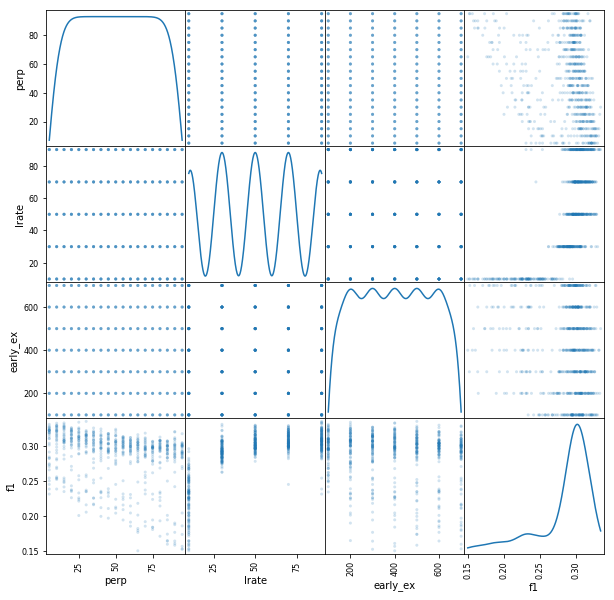

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(tab, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

CPU times: user 1min 6s, sys: 102 ms, total: 1min 6s
Wall time: 16.2 s


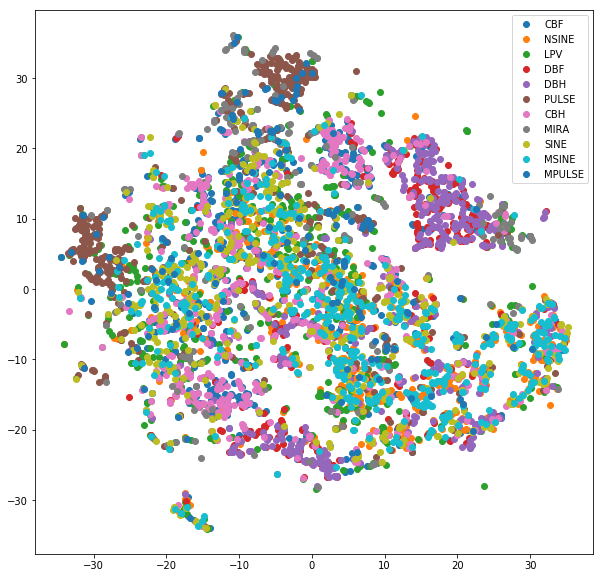

In [50]:
p, l, e, f1 = tab[tab['f1']==np.max(tab['f1'])].values[0]

t = mTSNE(n_components=2, perplexity=p, learning_rate=l, early_exaggeration=e, n_jobs=8)
%time embed = t.fit_transform(test_set[encod_cols].values)
test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname)
    i+=1
plt.legend()

CPU times: user 1min 14s, sys: 68.4 ms, total: 1min 15s
Wall time: 17.4 s


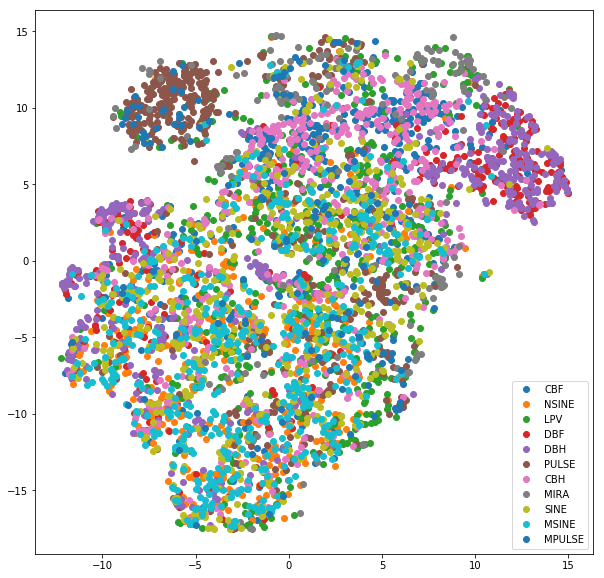

In [51]:
p, l, e, f1 = tab[tab['f1']==np.min(tab['f1'])].values[0]

t = mTSNE(n_components=2, perplexity=p, learning_rate=l, early_exaggeration=e, n_jobs=8)
%time embed = t.fit_transform(test_set[encod_cols].values)

test_set['embed_0'] = embed[:, 0]
test_set['embed_1'] = embed[:, 1]

plt.figure(figsize=(10, 10))
i = 0
for classname in test_set.CLASS.unique():
    plt.plot(test_set[test_set['CLASS']==classname]['embed_0'].values, 
             test_set[test_set['CLASS']==classname]['embed_1'].values, 
             'o', label=classname)
    i+=1
plt.legend()

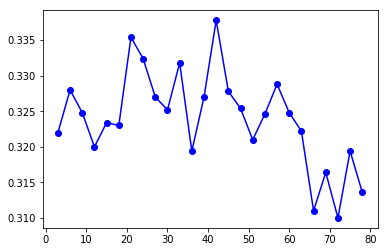

In [17]:
plt.plot(perp, f1, '-ob')

In [19]:
lrate = np.arange(3, 80, 3)
f1 = []
for alrate in lrate:
    t = mTSNE(n_components=2, perplexity=42, learning_rate=alrate, early_exaggeration=200, n_jobs=16)
    %time embed = t.fit_transform(test_set[encod_cols].values)
    test_set['embed_0'] = embed[:, 0]
    test_set['embed_1'] = embed[:, 1]
    Y = test_set['CLASS'].values
    X = embed  # test_set[['embed_0', 'embed_1']].values
    clf = KNeighborsClassifier()# n_neighbors=aperp)
    res = ml.experiment(clf=clf, multiclass=True, nfolds=10, printing=True, x=X, y=Y)
    f1.append(ml.metrics.f1_score(res['y_test'], res['predictions'], average='micro'))

CPU times: user 1min 36s, sys: 115 ms, total: 1min 36s
Wall time: 14.3 s
             precision    recall  f1-score   support

        CBF       0.24      0.38      0.30       540
        CBH       0.26      0.29      0.27       567
        DBF       0.34      0.32      0.33       315
        DBH       0.38      0.40      0.39       492
        LPV       0.25      0.29      0.27       564
       MIRA       0.34      0.22      0.26       195
     MPULSE       0.16      0.06      0.09       151
      MSINE       0.22      0.23      0.23       551
      NSINE       0.19      0.15      0.17       516
      PULSE       0.64      0.59      0.61       554
       SINE       0.21      0.15      0.17       555

avg / total       0.30      0.30      0.29      5000

CPU times: user 1min 28s, sys: 217 ms, total: 1min 29s
Wall time: 13.9 s
             precision    recall  f1-score   support

        CBF       0.26      0.38      0.31       540
        CBH       0.24      0.27      0.25       567
  

CPU times: user 1min 35s, sys: 140 ms, total: 1min 35s
Wall time: 14.4 s
             precision    recall  f1-score   support

        CBF       0.26      0.36      0.30       540
        CBH       0.28      0.34      0.31       567
        DBF       0.29      0.27      0.28       315
        DBH       0.46      0.49      0.47       492
        LPV       0.31      0.35      0.33       564
       MIRA       0.41      0.25      0.31       195
     MPULSE       0.17      0.07      0.10       151
      MSINE       0.25      0.28      0.26       551
      NSINE       0.21      0.17      0.19       516
      PULSE       0.63      0.63      0.63       554
       SINE       0.17      0.10      0.13       555

avg / total       0.32      0.32      0.32      5000

CPU times: user 1min 35s, sys: 216 ms, total: 1min 35s
Wall time: 14.3 s
             precision    recall  f1-score   support

        CBF       0.26      0.38      0.31       540
        CBH       0.27      0.34      0.30       567
  

CPU times: user 1min 32s, sys: 225 ms, total: 1min 32s
Wall time: 14.2 s
             precision    recall  f1-score   support

        CBF       0.27      0.39      0.32       540
        CBH       0.29      0.34      0.31       567
        DBF       0.33      0.30      0.31       315
        DBH       0.49      0.51      0.50       492
        LPV       0.33      0.35      0.34       564
       MIRA       0.39      0.28      0.33       195
     MPULSE       0.19      0.08      0.11       151
      MSINE       0.25      0.27      0.26       551
      NSINE       0.27      0.23      0.25       516
      PULSE       0.63      0.64      0.63       554
       SINE       0.21      0.14      0.17       555

avg / total       0.34      0.34      0.34      5000

CPU times: user 1min 31s, sys: 166 ms, total: 1min 31s
Wall time: 14.2 s
             precision    recall  f1-score   support

        CBF       0.26      0.37      0.30       540
        CBH       0.29      0.34      0.31       567
  

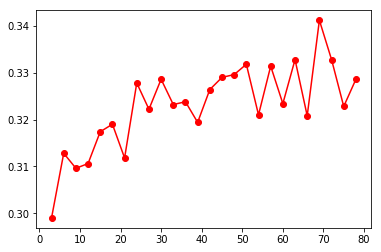

In [20]:
plt.plot(lrate, f1, '-or')